In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [280]:
dataset_training=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_training=dataset_training['Open'].values

In [281]:
dataset_training=np.reshape(dataset_training,(-1,1))
dataset_training

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [282]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
dataset_training=sc.fit_transform(dataset_training)

In [283]:
X_Train=[]
Y_Train=[]
for i in range(60,len(dataset_training)):
    X_Train.append(dataset_training[i-60:i,0])
    Y_Train.append(dataset_training[i,0])

In [284]:
X_Train=np.array(X_Train)
Y_Train=np.array(Y_Train)

In [285]:
X_Train=np.reshape(X_Train,(X_Train.shape[0],X_Train.shape[1],1))

In [286]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [287]:
regressor=Sequential()

In [288]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_Train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100,return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [289]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [290]:
regressor.fit(X_Train,Y_Train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0333
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 7/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 10/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 11/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 12/100
1198/1198 [==============================] - 3s 3ms/step - lo

1198/1198 [==============================] - 3s 3ms/step - loss: 0.0010
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/step - loss: 9.9782e-04
Epoch 99/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0010
Epoch 100/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0010


In [291]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')

In [292]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')

In [293]:
dataset_total=pd.concat((dataset_train ['Open'],dataset_test['Open']),axis=0)
dataset_total=dataset_total.values
dataset_total=dataset_total[len(dataset_total)-dataset_test.shape[0]-60:]
dataset_total=np.reshape(dataset_total,(-1,1))
dataset_total=sc.transform(dataset_total)

In [294]:
inputs=[]
for i in range(60,80):
    inputs.append(dataset_total[i-60:i])
inputs=np.array(inputs) 
inputs=np.reshape(inputs,(inputs.shape[0],inputs.shape[1],1))

In [295]:
predicted_stock_price=regressor.predict(inputs)

In [296]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[769.98   ],
       [767.51227],
       [772.3272 ],
       [773.7914 ],
       [777.8467 ],
       [785.75635],
       [789.25775],
       [787.4121 ],
       [787.6509 ],
       [789.24133],
       [790.1298 ],
       [789.61993],
       [789.00037],
       [790.09814],
       [791.0679 ],
       [799.9607 ],
       [807.8991 ],
       [813.78375],
       [812.82294],
       [800.39514]], dtype=float32)

In [297]:
real_stock_price=dataset_test['Open'].values

In [298]:
real_stock_price

array([778.81, 788.36, 786.08, 795.26, 806.4 , 807.86, 805.  , 807.14,
       807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3 , 829.62,
       837.81, 834.71, 814.66, 796.86])

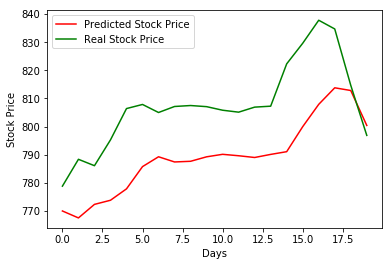

In [299]:
plt.plot(predicted_stock_price,color='r',label='Predicted Stock Price')
plt.plot(real_stock_price,color='g',label='Real Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()